In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

# Importing the dataset with the first column as an index, and Pandas may duplicate this index creating an additional column unless specified with 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Verifying data types, quantity of entries, and the overall size of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)


,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Convert integer column to string and front-fill with 0's to ensure 5 characters
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert string column to categorical
df["Area"] = df["Area"].astype("category")
# Replace city-specific time zones with their respective regions
df.TimeZone.replace({
	# Puerto Rico remains on Atlantic Standard Time
	"America/Puerto_Rico" : "US - Puerto Rico",
	# Eastern Time Zone observes DST
	"America/New_York": "US - Eastern",
	"America/Detroit" : "US - Eastern",
	"America/Indiana/Indianapolis" : "US - Eastern",
	"America/Indiana/Vevay" : "US - Eastern",
	"America/Indiana/Vincennes" : "US - Eastern",
	"America/Kentucky/Louisville" : "US - Eastern",
	"America/Toronto" : "US - Eastern",
	"America/Indiana/Marengo" : "US - Eastern",
	"America/Indiana/Winamac" : "US - Eastern",
	# Central Time Zone observes DST
	"America/Chicago" : "US - Central",
	"America/Menominee" : "US - Central",
	"America/Indiana/Knox" : "US - Central",
	"America/Indiana/Tell_City" : "US - Central",
	"America/North_Dakota/Beulah" : "US - Central",
	"America/North_Dakota/New_Salem" : "US - Central",
	# Mountain Time Zone observes DST
	"America/Denver" : "US - Mountain",
	"America/Boise" : "US - Mountain",
	# Arizona stays on Mountain Standard Time
	"America/Phoenix" : "US - Arizona",
	# Pacific Time Zone observes DST
	"America/Los_Angeles" : "US - Pacific",
	# Alaskan Time Zone observes DST
	"America/Nome" : "US - Alaskan",
	"America/Anchorage" : "US - Alaskan",
	"America/Sitka" : "US - Alaskan",
	"America/Yakutat" : "US - Alaskan",
	# Aleutian Time Zone observes DST
	"America/Adak" : "US - Aleutian",
	# Hawaii remains on Hawaii Standard Time
	"Pacific/Honolulu" : "US - Hawaiian"
	}, inplace=True)
# Convert string column to categorical
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert string column to categorical
df["Marital"] = df["Marital"].astype("category")
# Convert string column to categorical
df["Gender"] = df["Gender"].astype("category")
# Map "Yes" and "No" to True and False for boolean conversion
bool_mapping = {"Yes" : True, "No" : False}
# Convert string column to boolean
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert string column to boolean
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert string column to categorical
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert string column to boolean
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert string column to boolean
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert string column to categorical
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert string column to boolean
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert string column to boolean
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert string column to boolean
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert string column to boolean
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert string column to boolean
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert string column to boolean
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert string column to boolean
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert string column to boolean
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert string column to boolean
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert string column to categorical
df["Services"] = df["Services"].astype("category")
# Establish ordered categorical datatype structure for survey response columns
survey_scores = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
# Map integers to strings for categorical conversion
df["Item1"] = df["Item1"].map(str)
df["Item2"] = df["Item2"].map(str)
df["Item3"] = df["Item3"].map(str)
df["Item4"] = df["Item4"].map(str)
df["Item5"] = df["Item5"].map(str)
df["Item6"] = df["Item6"].map(str)
df["Item7"] = df["Item7"].map(str)
df["Item8"] = df["Item8"].map(str)
# Convert string columns to ordered categorical
df["Item1"] = df["Item1"].astype(survey_scores)
df["Item2"] = df["Item2"].astype(survey_scores)
df["Item3"] = df["Item3"].astype(survey_scores)
df["Item4"] = df["Item4"].astype(survey_scores)
df["Item5"] = df["Item5"].astype(survey_scores)
df["Item6"] = df["Item6"].astype(survey_scores)
df["Item7"] = df["Item7"].astype(survey_scores)
df["Item8"] = df["Item8"].astype(survey_scores)
# Rename 'HighBlood' column to 'Hypertension'
df = df.rename(columns={'HighBlood': 'Hypertension'})

In [4]:
# Generate a table with ratios of Hypertension/no Hypertension patients vs ReAdmits/non-ReAdmits patients utiliizing crosstab
table = pd.crosstab(df.ReAdmis, df.Hypertension)
print(table)

Hypertension  False  True 
ReAdmis                   
False          3747   2584
True           2163   1506


In [5]:
# Calculate the chi-square test statistic and associated p-value for independence
chi_result = stats.chi2_contingency(table)

# Print the chi-square test result
print(chi_result)


Chi2ContingencyResult(statistic=0.04239657973011679, pvalue=0.8368656684578771, dof=1, expected_freq=array([[3741.621, 2589.379],
       [2168.379, 1500.621]]))


In [6]:
# Print the p-value, which represents the probability under the null hypothesis of obtaining an observation as extreme as the one observed
print(f"The calculated p-value, representing the probability under the null hypothesis of obtaining an observation as extreme as the one observed, is {chi_result[1]:.3}.")


The calculated p-value, representing the probability under the null hypothesis of obtaining an observation as extreme as the one observed, is 0.837.


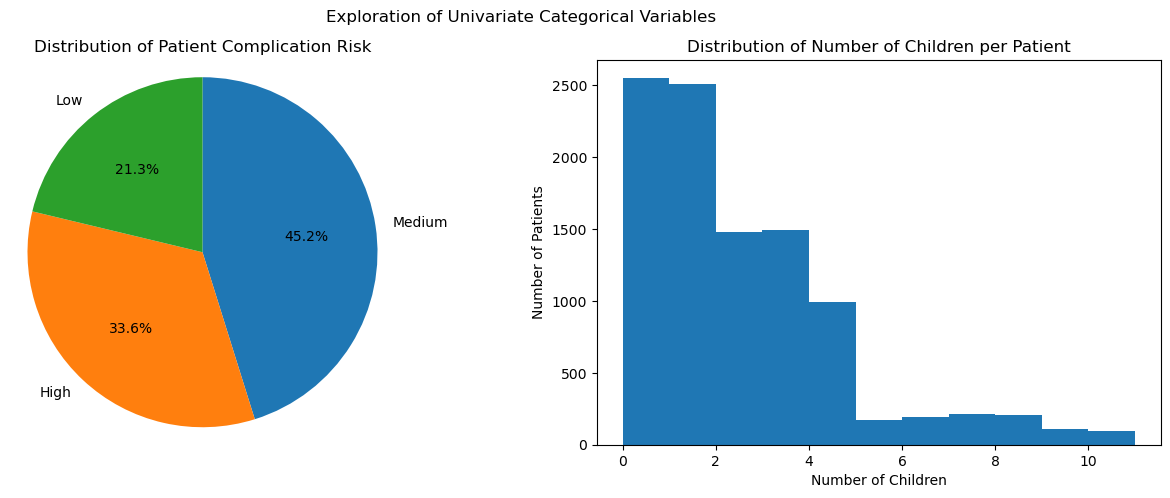

In [7]:
#C1:Identify the distribution of two continuous variables and two categorical variables using univariate statistics
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting
import numpy as np  # Importing numpy library for numerical operations
# Create a figure with a size of 16x5
plt.figure(figsize=[16, 5])
# Title for the entire figure
plt.suptitle("Exploration of Univariate Categorical Variables")
# Plot on the left: Distribution of Patient Complication Risk
plt.subplot(1, 2, 1)  # Creating a subplot, 1 row, 2 columns, and plot 1
plt.title("Distribution of Patient Complication Risk")  # Title for the subplot
risk_counts = df["Complication_risk"].value_counts()  # Counting the occurrences of each risk level
risk_labels = ["Medium", "High", "Low"]  # Labels for the risk levels
plt.pie(risk_counts, labels=risk_labels, autopct='%1.1f%%', startangle=90, counterclock=False)  # Creating a pie chart
plt.axis('square')  # Ensuring the pie chart is circular
# Plot on the right: Distribution of the Number of Children per Patient
plt.subplot(1, 2, 2)  # Creating a subplot, 1 row, 2 columns, and plot 2
plt.title("Distribution of Number of Children per Patient")  # Title for the subplot
bins = np.arange(0, df["Children"].max() + 2, 1)  # Defining the bins for histogram
plt.hist(data=df, x="Children", bins=bins)  # Creating a histogram for the number of children
plt.xlabel("Number of Children")  # Label for x-axis
plt.ylabel("Number of Patients")  # Label for y-axis
plt.show()  # Displaying the plot

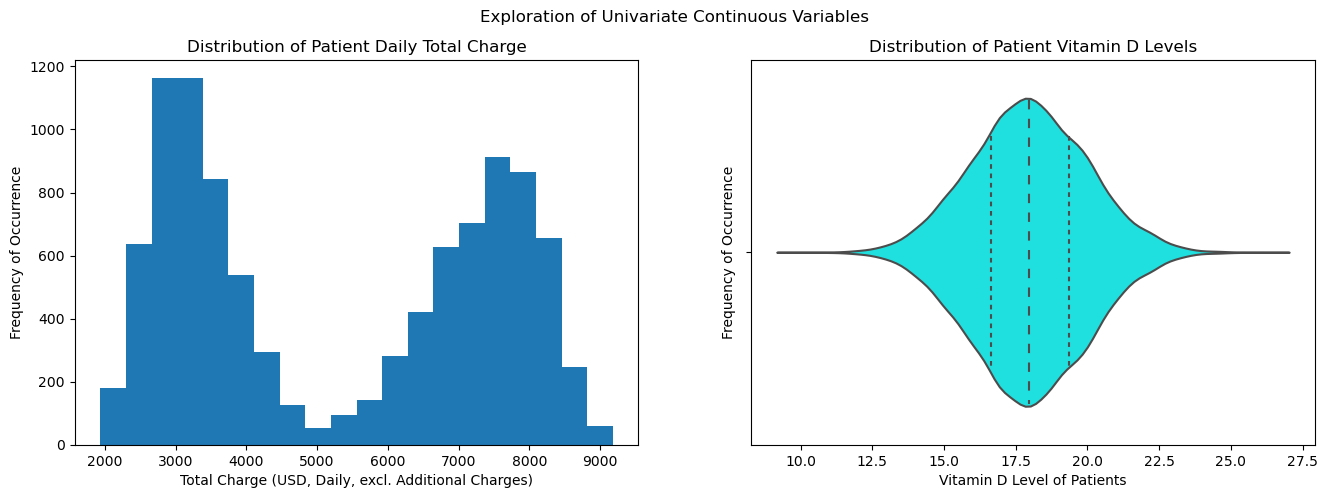

In [8]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for advanced visualization
# Create a figure with a size of 16x5
plt.figure(figsize=[16, 5])
# Title for the entire figure
plt.suptitle("Exploration of Univariate Continuous Variables")
# Plot on the left: Distribution of Total Charge
plt.subplot(1, 2, 1)  # Creating a subplot, 1 row, 2 columns, and plot 1
plt.title('Distribution of Patient Daily Total Charge')  # Title for the subplot
plt.hist(data=df, x="TotalCharge", bins=20)  # Creating a histogram for TotalCharge
plt.xlabel('Total Charge (USD, Daily, excl. Additional Charges)')  # Label for x-axis
plt.ylabel("Frequency of Occurrence")  # Label for y-axis
# Plot on the right: Distribution of Vitamin D Levels
plt.subplot(1, 2, 2)  # Creating a subplot, 1 row, 2 columns, and plot 2
plt.title("Distribution of Patient Vitamin D Levels")  # Title for the subplot
sns.violinplot(data=df, x="VitD_levels", color="cyan", inner="quartile")  # Creating a violin plot for VitD_levels
plt.xlabel("Vitamin D Level of Patients")  # Label for x-axis
plt.ylabel("Frequency of Occurrence")  # Label for y-axis
plt.show()  # Displaying the plots

In [9]:
# Count the occurrences of different levels of complication risk in the DataFrame column "Complication_risk"
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [10]:
# Count the occurrences of different numbers of children in the DataFrame column "Children" and sort them by index
df.Children.value_counts().sort_index()

Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

In [11]:
# Generate descriptive statistics for the continuous variable "TotalCharge" in the DataFrame
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [12]:
# Compute descriptive statistics for the continuous variable "VitD_levels" in the DataFrame
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [13]:
# Generate descriptive statistics for the continuous variable "Additional_charges" in the DataFrame
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [14]:
# Count the occurrences of each category in the categorical variable "Gender" in the DataFrame
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

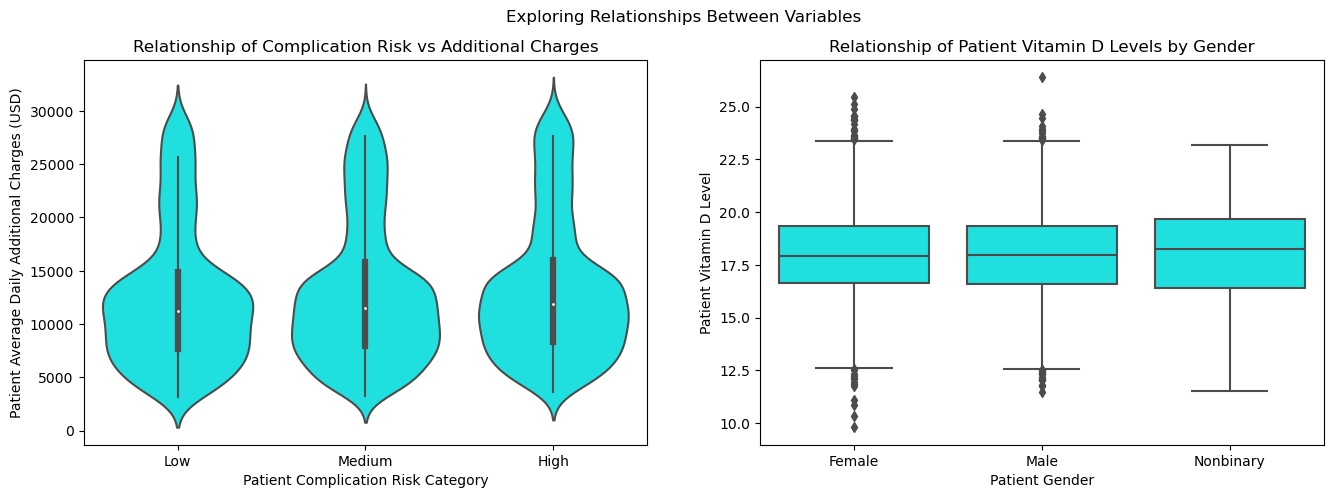

In [30]:
# Create a figure with a size of 16x5 for bivariate exploration
plt.figure(figsize=[16, 5])
# Add a super title for the entire figure
plt.suptitle("Exploring Relationships Between Variables")
# Plot on the left: Bivariate exploration of Complication_risk and Additional_charges
plt.subplot(1, 2, 1)  # Create a subplot, 1 row, 2 columns, and plot 1
plt.title('Relationship of Complication Risk vs Additional Charges')  # Title for the subplot
plot_order = ["Low", "Medium", "High"]  # Define order for x-axis categories
sns.violinplot(data=df, x="Complication_risk", y="Additional_charges", color="cyan", order=plot_order)  # Create violin plot
plt.xlabel('Patient Complication Risk Category')  # Label for x-axis
plt.ylabel("Patient Average Daily Additional Charges (USD)")  # Label for y-axis
# Plot on the right: Bivariate exploration of Gender and VitD_levels
plt.subplot(1, 2, 2)  # Create a subplot, 1 row, 2 columns, and plot 2
plt.title("Relationship of Patient Vitamin D Levels by Gender")  # Title for the subplot
sns.boxplot(data=df, x="Gender", y="VitD_levels", color="cyan")  # Create box plot
plt.xlabel("Patient Gender")  # Label for x-axis
plt.ylabel("Patient Vitamin D Level")  # Label for y-axis

plt.show()  # Display the plots


In [35]:
# Calculate correlation between VitD_levels and Additional_charges
correlation = df['VitD_levels'].corr(df['Additional_charges'])
print("Correlation between VitD_levels and Additional_charges:", correlation)


Correlation between VitD_levels and Additional_charges: 0.008289992581332683


In [38]:

# Define the bins for categorizing Additional_charges
bins = [3125.703, 7986.487755, 11573.977735, 15626.490000, 30566.070000]
labels = ['Low', 'Medium', 'High', 'Very High']


In [45]:
from scipy.stats import chi2_contingency


# Categorize Additional_charges
df['Additional_charges_category'] = pd.cut(df['Additional_charges'], bins=bins, labels=labels)

# Create the contingency table
contingency_table = pd.crosstab(df['Complication_risk'], df['Additional_charges_category'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Additional_charges_category   Low  Medium  High  Very High
Complication_risk                                         
High                          759     845   886        868
Low                           588     516   534        486
Medium                       1152    1139  1080       1146


In [49]:

# Print the chi-square test results with clarification
print("\nChi-Square Test Results (for association between Complication_risk and Additional_charges_category):")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-Square Test Results (for association between Complication_risk and Additional_charges_category):
Chi-square value: 24.61312982182842
P-value: 0.0004026007048223903


In [53]:

# Calculate mean Vitamin D levels for each gender group
mean_vitD_female = df[df['Gender'] == 'Female']['VitD_levels'].mean()
mean_vitD_male = df[df['Gender'] == 'Male']['VitD_levels'].mean()
mean_vitD_nonbinary = df[df['Gender'] == 'Nonbinary']['VitD_levels'].mean()

print("\nMean Vitamin D levels for Female:", mean_vitD_female)
print("Mean Vitamin D levels for Male:", mean_vitD_male)
print("Mean Vitamin D levels for Nonbinary:", mean_vitD_nonbinary)

# Additional comments to clarify interpretations
print("\nBivariate Stats Interpretation:")
print("1. Correlation between VitD_levels and Additional_charges indicates the strength and direction of their relationship.")
print("2. Chi-Square Test Results assess the association between Complication_risk and Additional_charges_category.")
print("3. Mean Vitamin D levels are compared across gender groups.")



Mean Vitamin D levels for Female: 17.98585338779992
Mean Vitamin D levels for Male: 17.936360199517615
Mean Vitamin D levels for Nonbinary: 18.07962064182243

Bivariate Stats Interpretation:
1. Correlation between VitD_levels and Additional_charges indicates the strength and direction of their relationship.
2. Chi-Square Test Results assess the association between Complication_risk and Additional_charges_category.
3. Mean Vitamin D levels are compared across gender groups.
